In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.stats import linregress
from statsmodels.tsa.arima.model import ARIMA
from pyts.decomposition import SingularSpectrumAnalysis
from pmdarima.arima import auto_arima
import warnings
import itertools
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram, find_peaks
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox, normaltest
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import pywt
from sklearn.decomposition import PCA
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.utils.extmath import randomized_svd
from PyEMD import EMD
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
from pykalman import KalmanFilter
import torch
import torch.nn as nn
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from astropy.timeseries import LombScargle
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import datetime
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import correlate
from scipy.fft import fft, fftfreq
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from collections import Counter
from sklearn.cluster import DBSCAN
import requests
from io import StringIO
from scipy.stats import spearmanr
from sklearn.metrics import mutual_info_score
from statsmodels.tsa.stattools import grangercausalitytests
from pyinform.transferentropy import transfer_entropy
from tigramite.data_processing import DataFrame as TDF
from tigramite.pcmci import PCMCI
import pyinform
import pyEDM
from sklearn.ensemble import IsolationForest
import yfinance as yf
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
from pytrends.request import TrendReq
from fredapi import Fred
from dotenv import load_dotenv
import os
from sklearn.model_selection import train_test_split
import torch.optim as optim

# Подавляем только FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [8]:
ethereum = pd.read_csv('ethereum-historical-data.csv')
ethereum.sort_values('Дата', ignore_index=True)

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
0,2022-06-09,"$1,788","$1,827","$1,777","$1,794","$1,786",-0.0763,"$3,517,858,249",NaN,"$216,347,876,812",NaN
1,2022-06-10,"$1,784","$1,796","$1,658","$1,724","$1,658",-7.0700,"$5,942,350,333",68.92,"$200,837,531,164",-7.17
2,2022-06-11,"$1,658","$1,676","$1,502","$1,590","$1,524",-8.0800,"$6,923,227,705",16.51,"$184,659,000,545",-8.06
3,2022-06-12,"$1,527","$1,535","$1,428","$1,482","$1,439",-5.7700,"$7,525,554,351",8.70,"$174,284,937,223",-5.62
4,2022-06-13,"$1,438","$1,444","$1,171","$1,313","$1,199",-16.5800,"$16,632,841,082",121.02,"$145,320,131,839",-16.62
...,...,...,...,...,...,...,...,...,...,...,...
1092,2025-06-05,"$2,610","$2,636","$2,408","$2,518","$2,419",-7.3100,"$11,055,629,365",46.83,"$291,993,241,343",-7.33
1093,2025-06-06,"$2,418","$2,521","$2,407","$2,457","$2,481",2.6200,"$7,678,377,029",-30.55,"$299,569,204,479",2.59
1094,2025-06-07,"$2,480","$2,540","$2,463","$2,502","$2,526",1.8900,"$4,015,470,520",-47.70,"$304,998,298,251",1.81
1095,2025-06-08,"$2,527","$2,541","$2,495","$2,518","$2,509",-0.6990,"$4,695,476,215",16.93,"$302,895,144,740",-0.69


In [16]:
ethereum['Изм. Капитализ.'].fillna(0, inplace=True)
ethereum

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
0,2025-06-09,"$2,509","$2,564","$2,482","$2,530","$2,564",2.1800,"$6,363,313,461",35.52,"$309,550,694,998",2.20
1,2025-06-08,"$2,527","$2,541","$2,495","$2,518","$2,509",-0.6990,"$4,695,476,215",16.93,"$302,895,144,740",-0.69
2,2025-06-07,"$2,480","$2,540","$2,463","$2,502","$2,526",1.8900,"$4,015,470,520",-47.70,"$304,998,298,251",1.81
3,2025-06-06,"$2,418","$2,521","$2,407","$2,457","$2,481",2.6200,"$7,678,377,029",-30.55,"$299,569,204,479",2.59
4,2025-06-05,"$2,610","$2,636","$2,408","$2,518","$2,419",-7.3100,"$11,055,629,365",46.83,"$291,993,241,343",-7.33
...,...,...,...,...,...,...,...,...,...,...,...
1092,2022-06-13,"$1,438","$1,444","$1,171","$1,313","$1,199",-16.5800,"$16,632,841,082",121.02,"$145,320,131,839",-16.62
1093,2022-06-12,"$1,527","$1,535","$1,428","$1,482","$1,439",-5.7700,"$7,525,554,351",8.70,"$174,284,937,223",-5.62
1094,2022-06-11,"$1,658","$1,676","$1,502","$1,590","$1,524",-8.0800,"$6,923,227,705",16.51,"$184,659,000,545",-8.06
1095,2022-06-10,"$1,784","$1,796","$1,658","$1,724","$1,658",-7.0700,"$5,942,350,333",68.92,"$200,837,531,164",-7.17


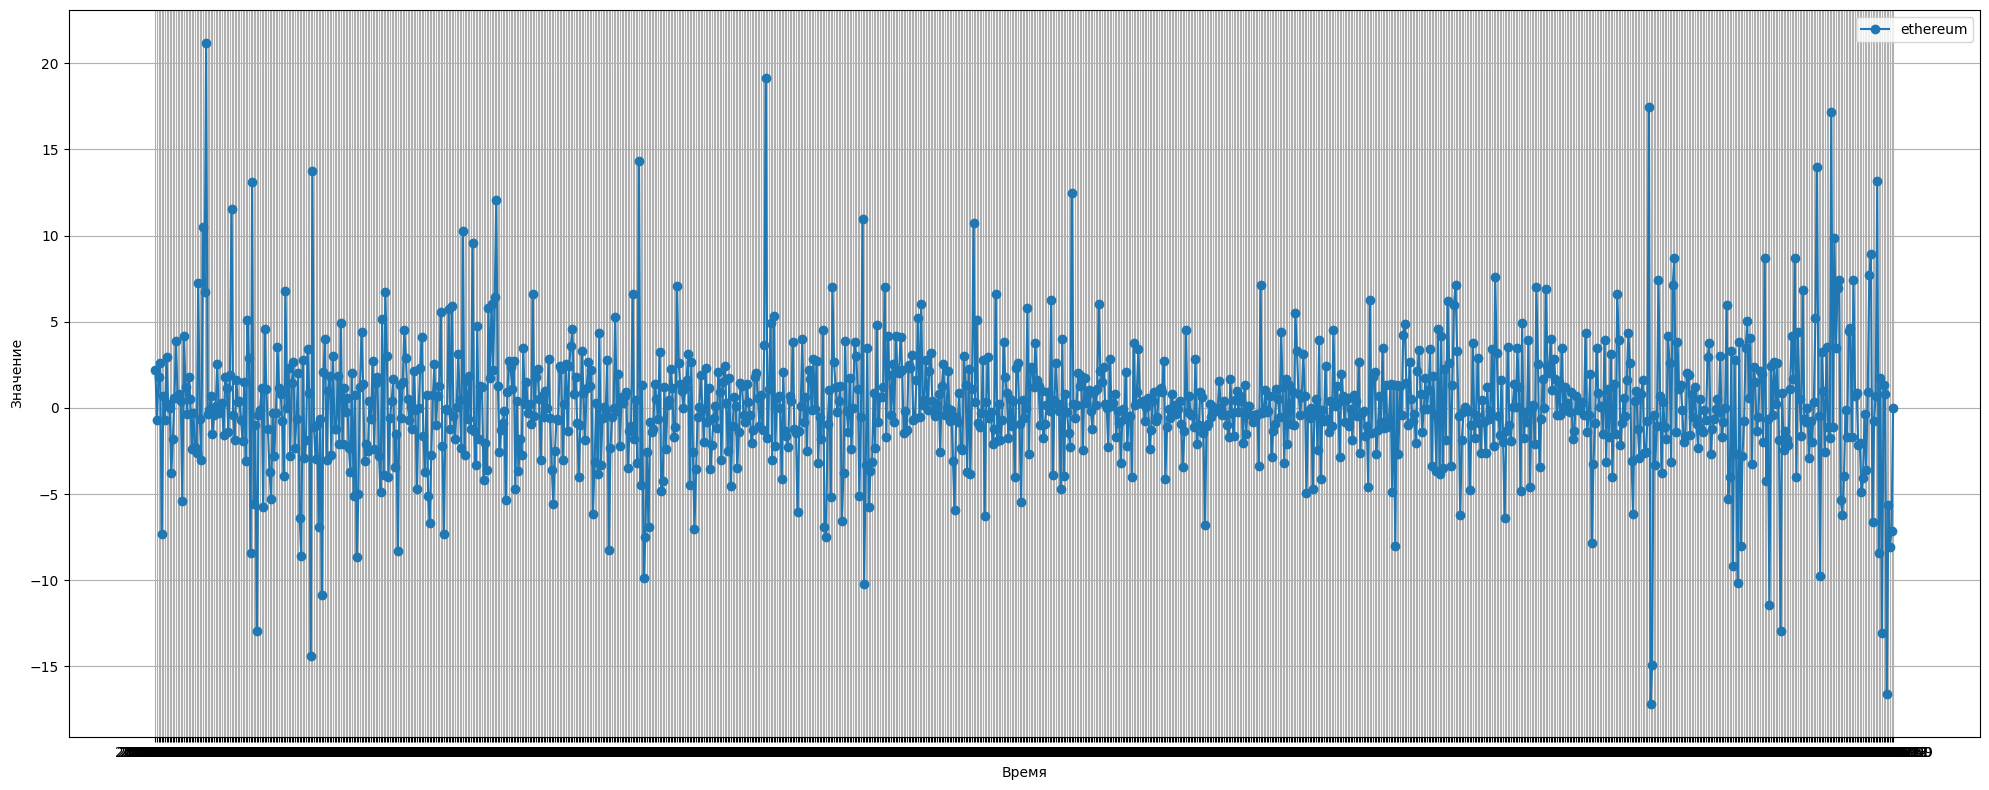

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(ethereum['Дата'],ethereum['Изм. Капитализ.'], marker='o', label="ethereum")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
tether = pd.read_csv('tether-historical-data.csv')
tether.sort_values('Дата', ignore_index=True)

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
0,2022-06-09,$0.999,$1.00,$0.998,$1.00,$0.999,-0.01790,"$14,393,511,949",NaN,"$72,432,579,636",NaN
1,2022-06-10,$0.999,$1.00,$0.999,$0.999,$0.999,-0.01440,"$17,230,823,241",19.71,"$72,421,876,212",-0.01480
2,2022-06-11,$0.999,$0.999,$0.999,$0.999,$0.999,0.00271,"$16,361,204,251",-5.05,"$72,424,144,870",0.00313
3,2022-06-12,$0.999,$0.999,$0.999,$0.999,$0.999,0.00341,"$20,573,871,168",25.75,"$72,223,890,515",-0.27700
4,2022-06-13,$0.999,$0.999,$0.997,$0.999,$0.999,-0.05070,"$41,857,085,897",103.45,"$72,186,987,953",-0.05110
...,...,...,...,...,...,...,...,...,...,...,...
1092,2025-06-05,$1.00,$1.00,$1.00,$1.00,$1.00,-0.00639,"$42,792,021,035",15.72,"$153,888,722,841",0.06680
1093,2025-06-06,$1.00,$1.00,$1.00,$1.00,$1.00,0.02980,"$39,952,613,124",-6.64,"$154,225,023,520",0.21900
1094,2025-06-07,$1.00,$1.00,$1.00,$1.00,$1.00,-0.02120,"$28,336,631,541",-29.07,"$154,537,191,337",0.20200
1095,2025-06-08,$1.00,$1.00,$1.00,$1.00,$1.00,-0.00437,"$26,694,051,292",-5.80,"$154,815,848,019",0.18000


In [18]:
tether['Изм. Капитализ.'].fillna(0, inplace=True)
tether

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
0,2025-06-09,$1.00,$1.00,$1.00,$1.00,$1.00,0.01020,"$34,630,490,410",29.73,"$154,831,662,880",0.01020
1,2025-06-08,$1.00,$1.00,$1.00,$1.00,$1.00,-0.00437,"$26,694,051,292",-5.80,"$154,815,848,019",0.18000
2,2025-06-07,$1.00,$1.00,$1.00,$1.00,$1.00,-0.02120,"$28,336,631,541",-29.07,"$154,537,191,337",0.20200
3,2025-06-06,$1.00,$1.00,$1.00,$1.00,$1.00,0.02980,"$39,952,613,124",-6.64,"$154,225,023,520",0.21900
4,2025-06-05,$1.00,$1.00,$1.00,$1.00,$1.00,-0.00639,"$42,792,021,035",15.72,"$153,888,722,841",0.06680
...,...,...,...,...,...,...,...,...,...,...,...
1092,2022-06-13,$0.999,$0.999,$0.997,$0.999,$0.999,-0.05070,"$41,857,085,897",103.45,"$72,186,987,953",-0.05110
1093,2022-06-12,$0.999,$0.999,$0.999,$0.999,$0.999,0.00341,"$20,573,871,168",25.75,"$72,223,890,515",-0.27700
1094,2022-06-11,$0.999,$0.999,$0.999,$0.999,$0.999,0.00271,"$16,361,204,251",-5.05,"$72,424,144,870",0.00313
1095,2022-06-10,$0.999,$1.00,$0.999,$0.999,$0.999,-0.01440,"$17,230,823,241",19.71,"$72,421,876,212",-0.01480


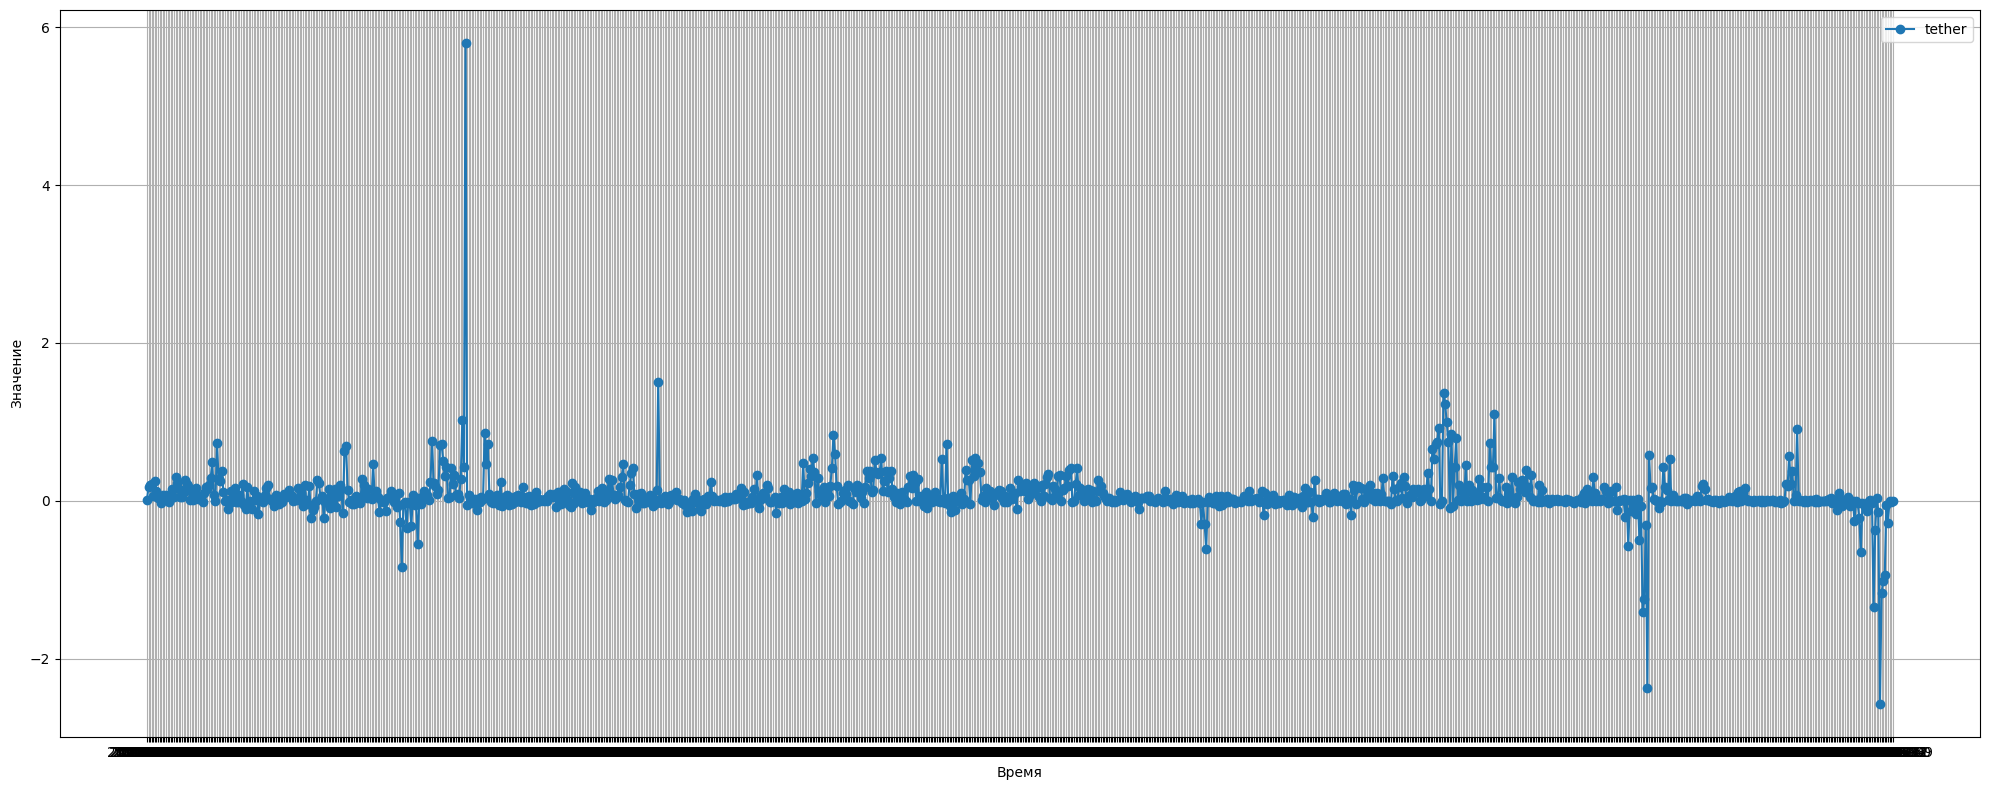

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(tether['Дата'],tether['Изм. Капитализ.'], marker='o', label="tether")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
solana = pd.read_csv('solana-historical-data.csv')
solana.sort_values('Дата', ignore_index=True)

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
0,2022-06-09,$38.77,$41.59,$38.53,$39.70,$39.90,2.91,"$845,083,513",NaN,"$13,641,597,977",NaN
1,2022-06-10,$39.85,$40.64,$37.00,$38.63,$37.04,-7.05,"$784,475,459",-7.17,"$12,663,454,413",-7.17
2,2022-06-11,$37.06,$37.79,$33.38,$35.51,$33.81,-8.76,"$711,719,673",-9.27,"$11,565,502,324",-8.67
3,2022-06-12,$33.86,$34.18,$30.71,$32.36,$30.71,-9.29,"$959,843,793",34.86,"$10,505,024,841",-9.17
4,2022-06-13,$30.77,$30.86,$26.18,$28.95,$27.97,-9.09,"$1,689,254,223",75.99,"$9,572,858,962",-8.87
...,...,...,...,...,...,...,...,...,...,...,...
1092,2025-06-05,$153.33,$154.28,$142.32,$148.61,$144.50,-5.76,"$3,351,802,624",70.89,"$75,733,219,718",-5.50
1093,2025-06-06,$144.54,$151.85,$144.45,$147.25,$148.15,2.50,"$2,008,109,466",-40.09,"$77,645,730,234",2.53
1094,2025-06-07,$148.06,$152.65,$147.26,$149.50,$150.05,1.35,"$1,386,025,930",-30.98,"$78,748,652,657",1.42
1095,2025-06-08,$150.11,$154.85,$148.24,$151.44,$152.55,1.63,"$1,357,439,380",-2.06,"$80,062,391,067",1.67


In [22]:
solana['Изм. Капитализ.'].fillna(0, inplace=True)
solana

,Дата,Открытие,Макс,Мин,Средняя,Закрыть,Изм.,Объём,Изм. Объема,Капитализ.,Изм. Капитализ.
0,2025-06-09,$152.43,$156.44,$149.93,$153.81,$156.44,2.63,"$2,262,193,512",66.65,"$82,118,168,854",2.57
1,2025-06-08,$150.11,$154.85,$148.24,$151.44,$152.55,1.63,"$1,357,439,380",-2.06,"$80,062,391,067",1.67
2,2025-06-07,$148.06,$152.65,$147.26,$149.50,$150.05,1.35,"$1,386,025,930",-30.98,"$78,748,652,657",1.42
3,2025-06-06,$144.54,$151.85,$144.45,$147.25,$148.15,2.50,"$2,008,109,466",-40.09,"$77,645,730,234",2.53
4,2025-06-05,$153.33,$154.28,$142.32,$148.61,$144.50,-5.76,"$3,351,802,624",70.89,"$75,733,219,718",-5.50
...,...,...,...,...,...,...,...,...,...,...,...
1092,2022-06-13,$30.77,$30.86,$26.18,$28.95,$27.97,-9.09,"$1,689,254,223",75.99,"$9,572,858,962",-8.87
1093,2022-06-12,$33.86,$34.18,$30.71,$32.36,$30.71,-9.29,"$959,843,793",34.86,"$10,505,024,841",-9.17
1094,2022-06-11,$37.06,$37.79,$33.38,$35.51,$33.81,-8.76,"$711,719,673",-9.27,"$11,565,502,324",-8.67
1095,2022-06-10,$39.85,$40.64,$37.00,$38.63,$37.04,-7.05,"$784,475,459",-7.17,"$12,663,454,413",-7.17


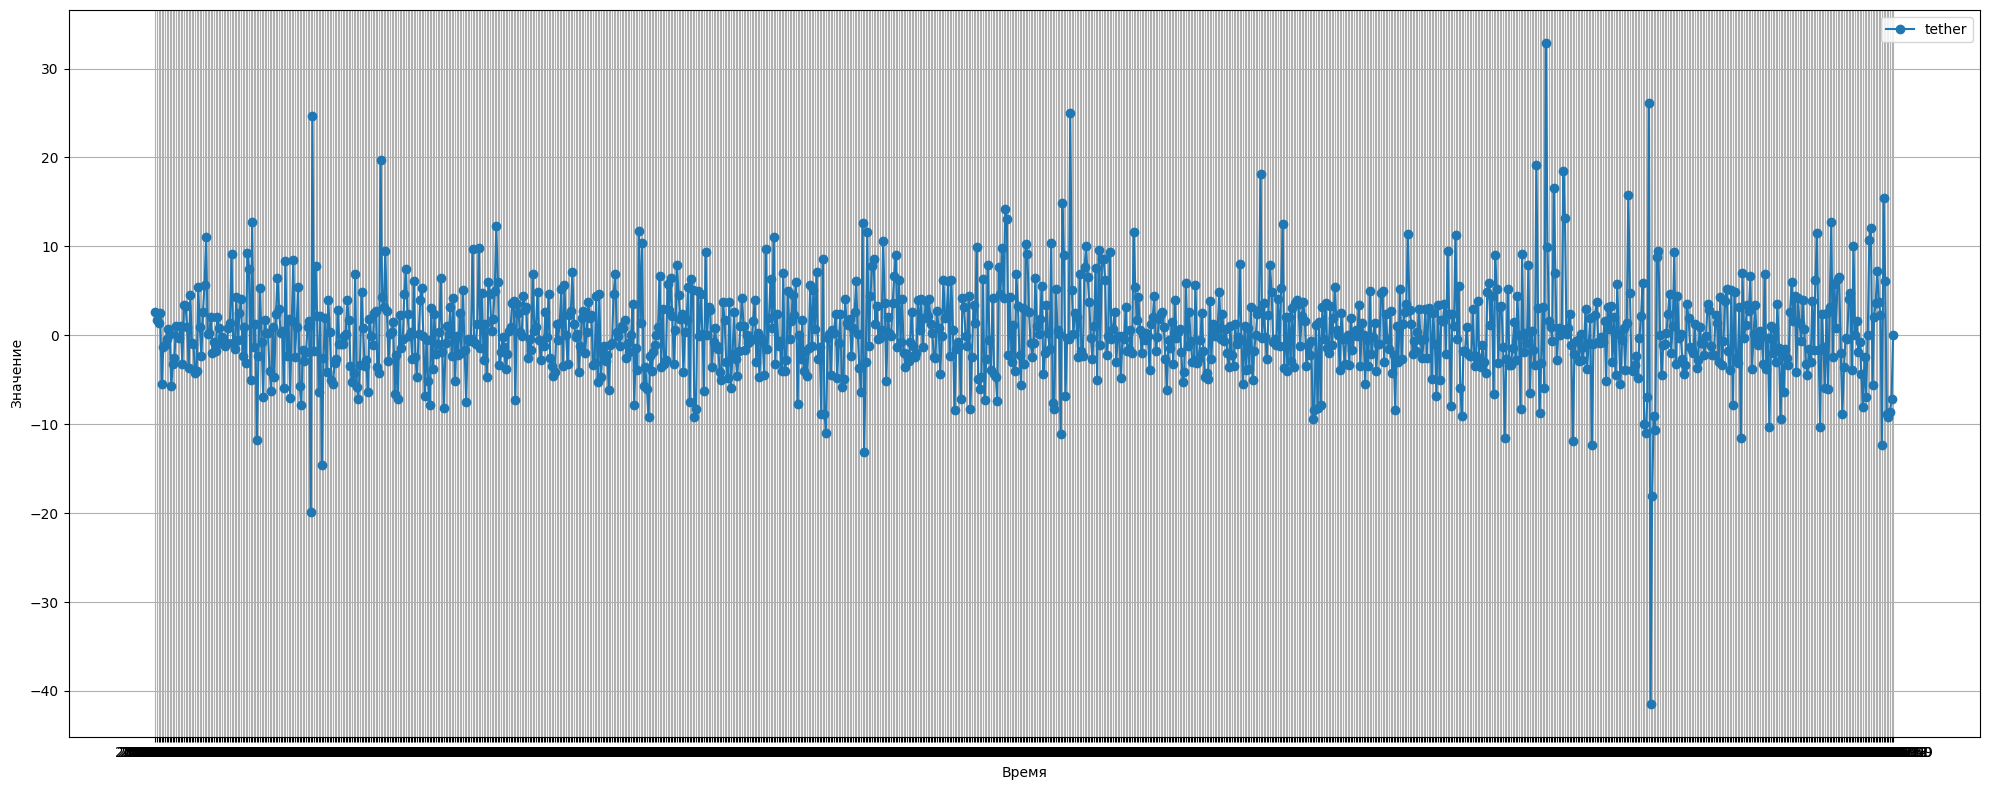

In [24]:
plt.figure(figsize=(20, 8))
plt.plot(solana['Дата'],solana['Изм. Капитализ.'], marker='o', label="tether")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
ethereum_series = ethereum['Изм. Капитализ.'].values


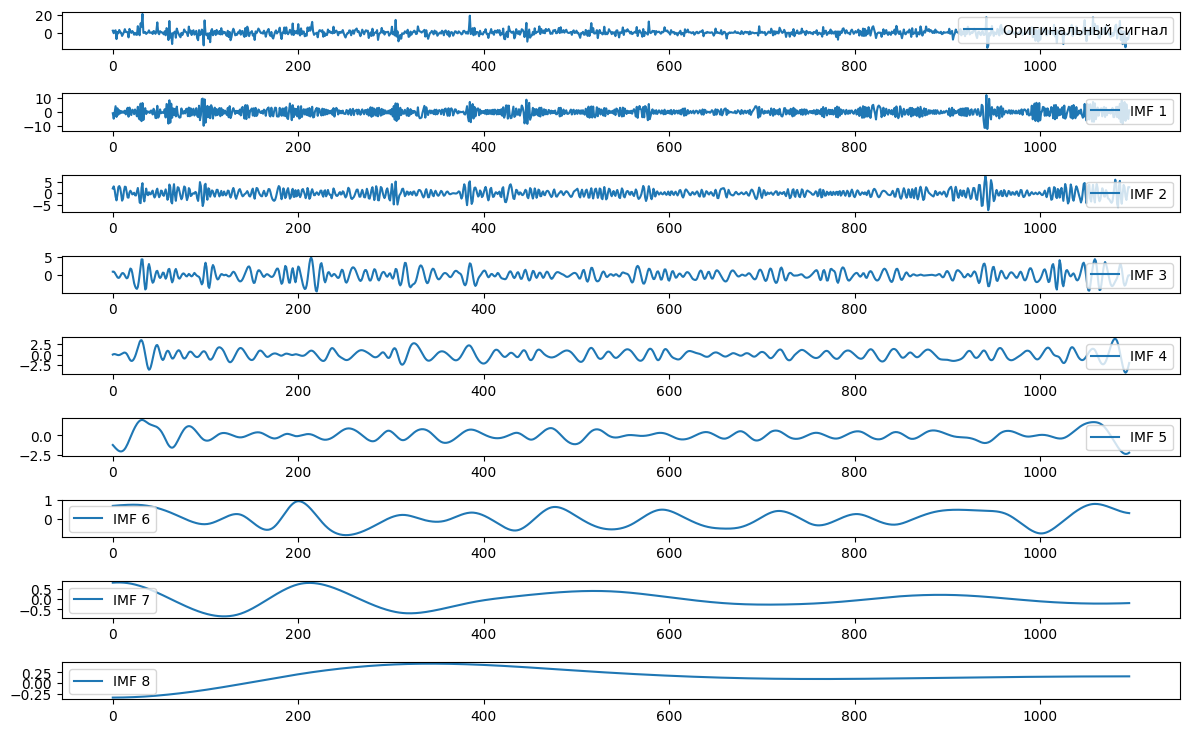

In [26]:
emd = EMD()
imfs = emd(ethereum_series)

# Визуализация
plt.figure(figsize=(12, 8))
plt.subplot(len(imfs)+2, 1, 1)
plt.plot(ethereum_series, label='Оригинальный сигнал')
plt.legend()

# Все IMFs
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs)+2, 1, i+2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend()

plt.tight_layout()  # Чтобы графики не налезали друг на друга

# Показываем график
plt.show()

In [27]:
ethereum_series_emd = np.sum(imfs[2:8], axis=0)
ethereum_series_emd = pd.Series(ethereum_series_emd)

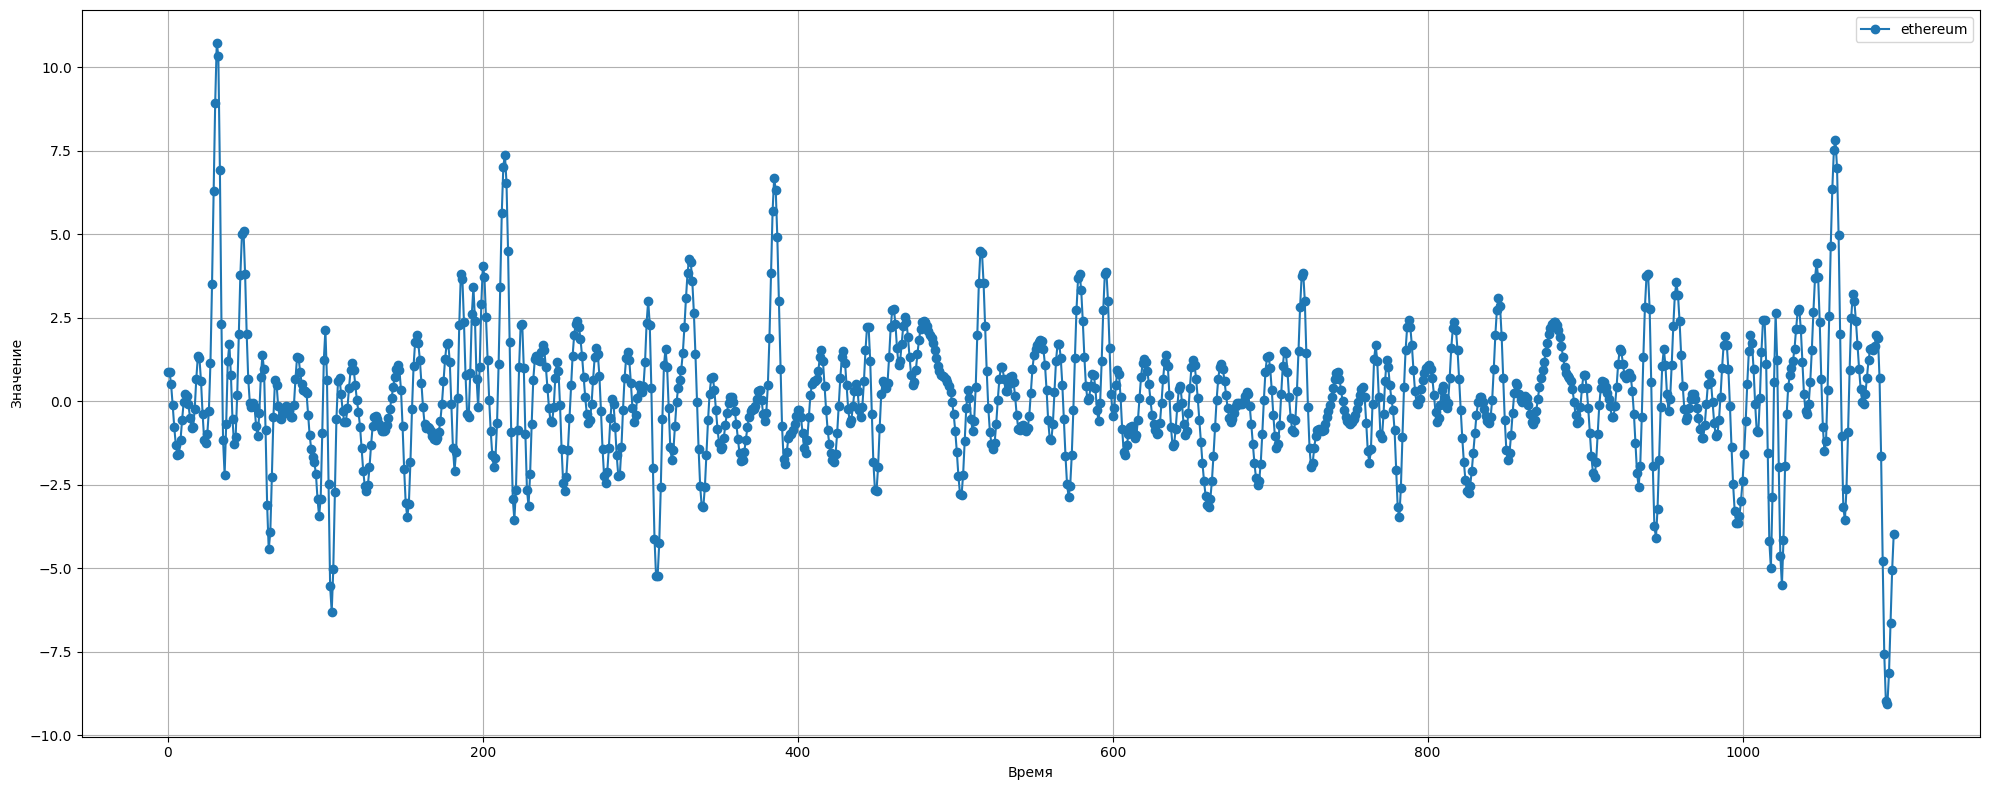

In [28]:
plt.figure(figsize=(20, 8))
plt.plot(ethereum_series_emd, marker='o', label="ethereum")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
solana_series = solana['Изм. Капитализ.'].values


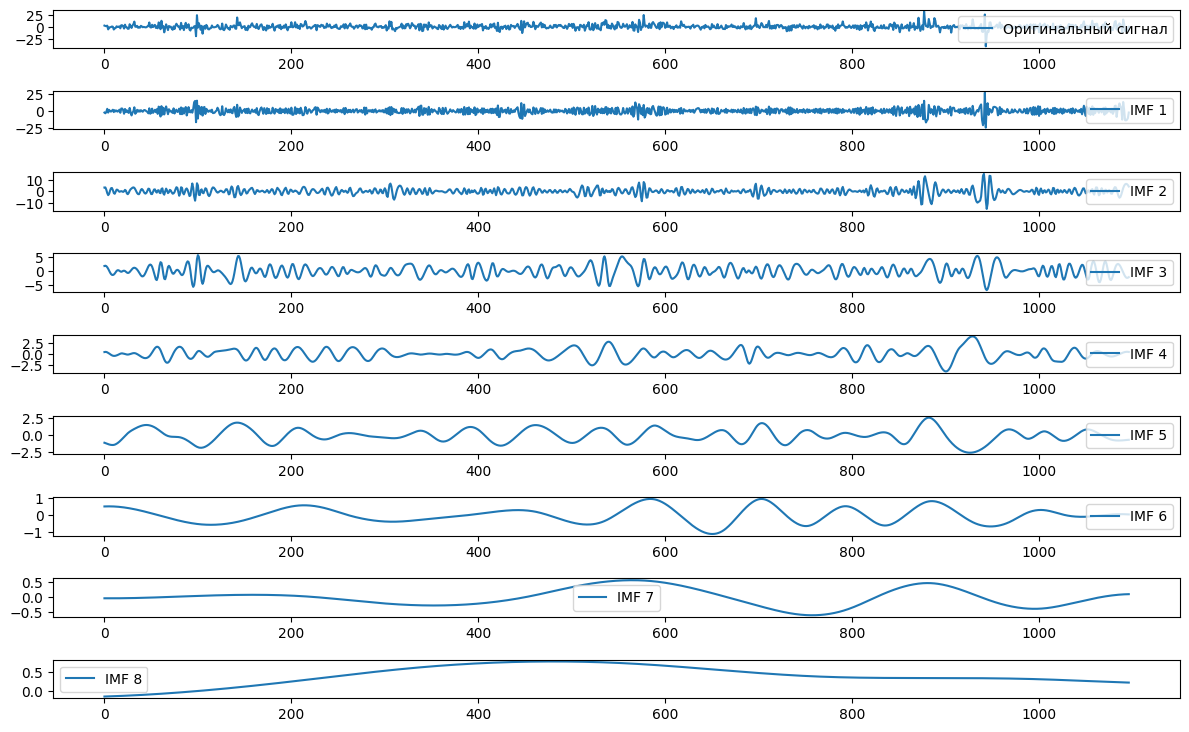

In [31]:
emd_solana = EMD()
imfs_solana = emd_solana(solana_series)

# Визуализация
plt.figure(figsize=(12, 8))
plt.subplot(len(imfs_solana)+2, 1, 1)
plt.plot(solana_series, label='Оригинальный сигнал')
plt.legend()

# Все IMFs
for i, imf in enumerate(imfs_solana):
    plt.subplot(len(imfs_solana)+2, 1, i+2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend()

plt.tight_layout()  # Чтобы графики не налезали друг на друга

# Показываем график
plt.show()

In [32]:
solana_series_emd = np.sum(imfs_solana[2:8], axis=0)
solana_series_emd = pd.Series(solana_series_emd)

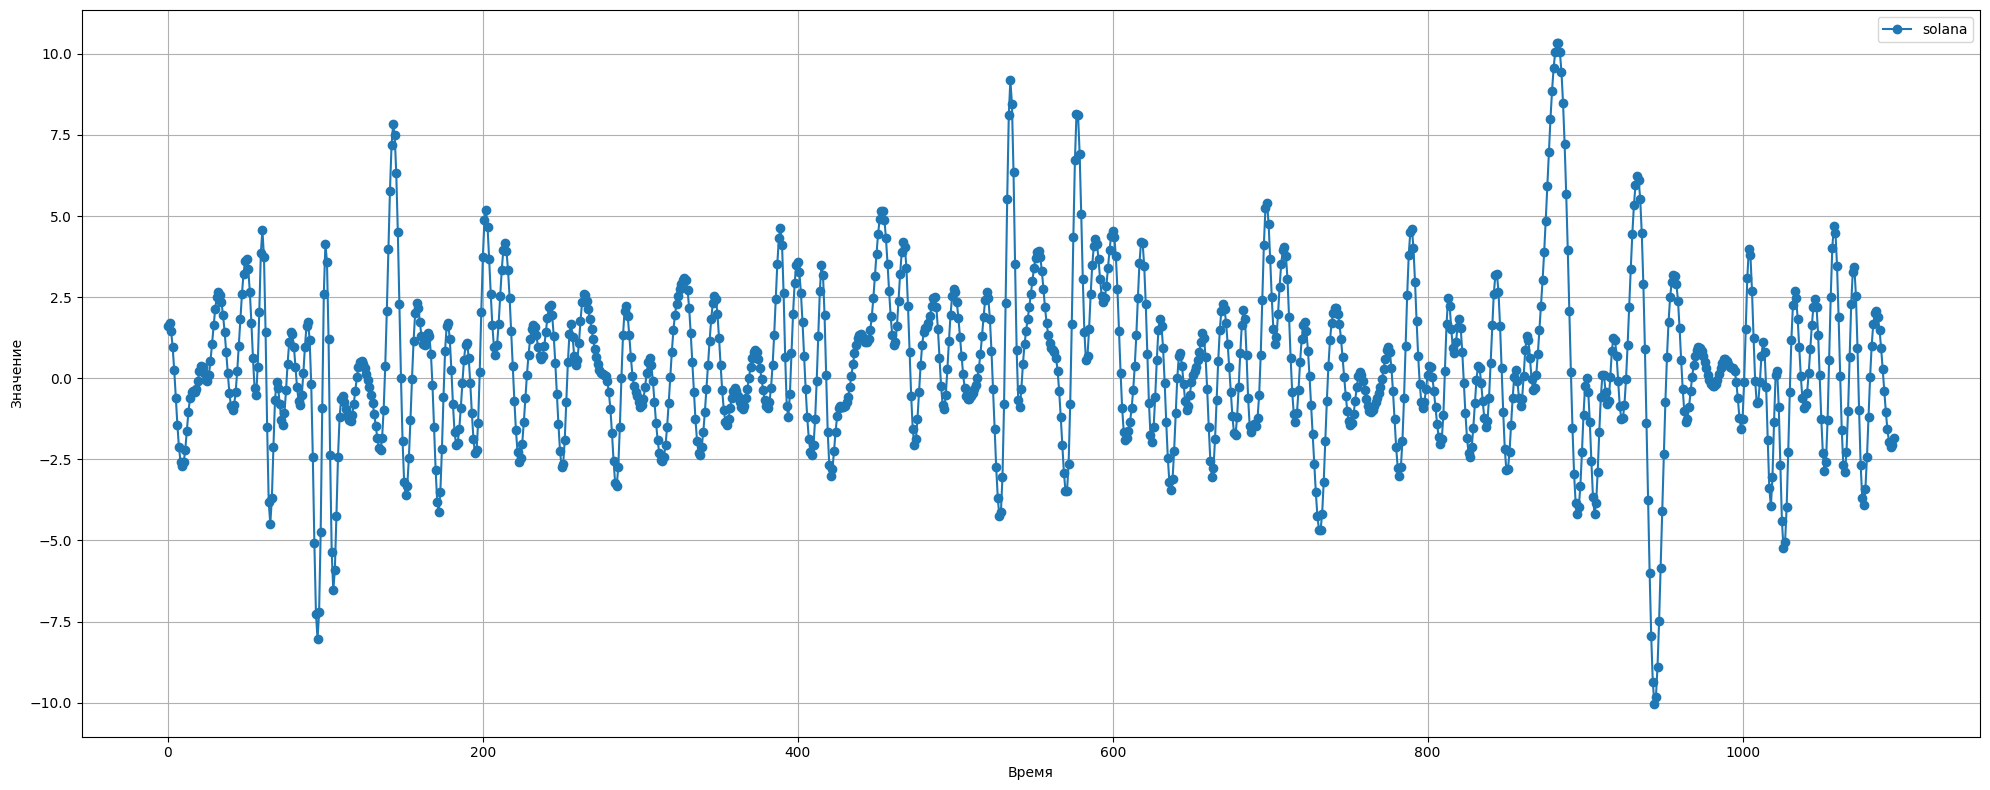

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(solana_series_emd, marker='o', label="solana")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

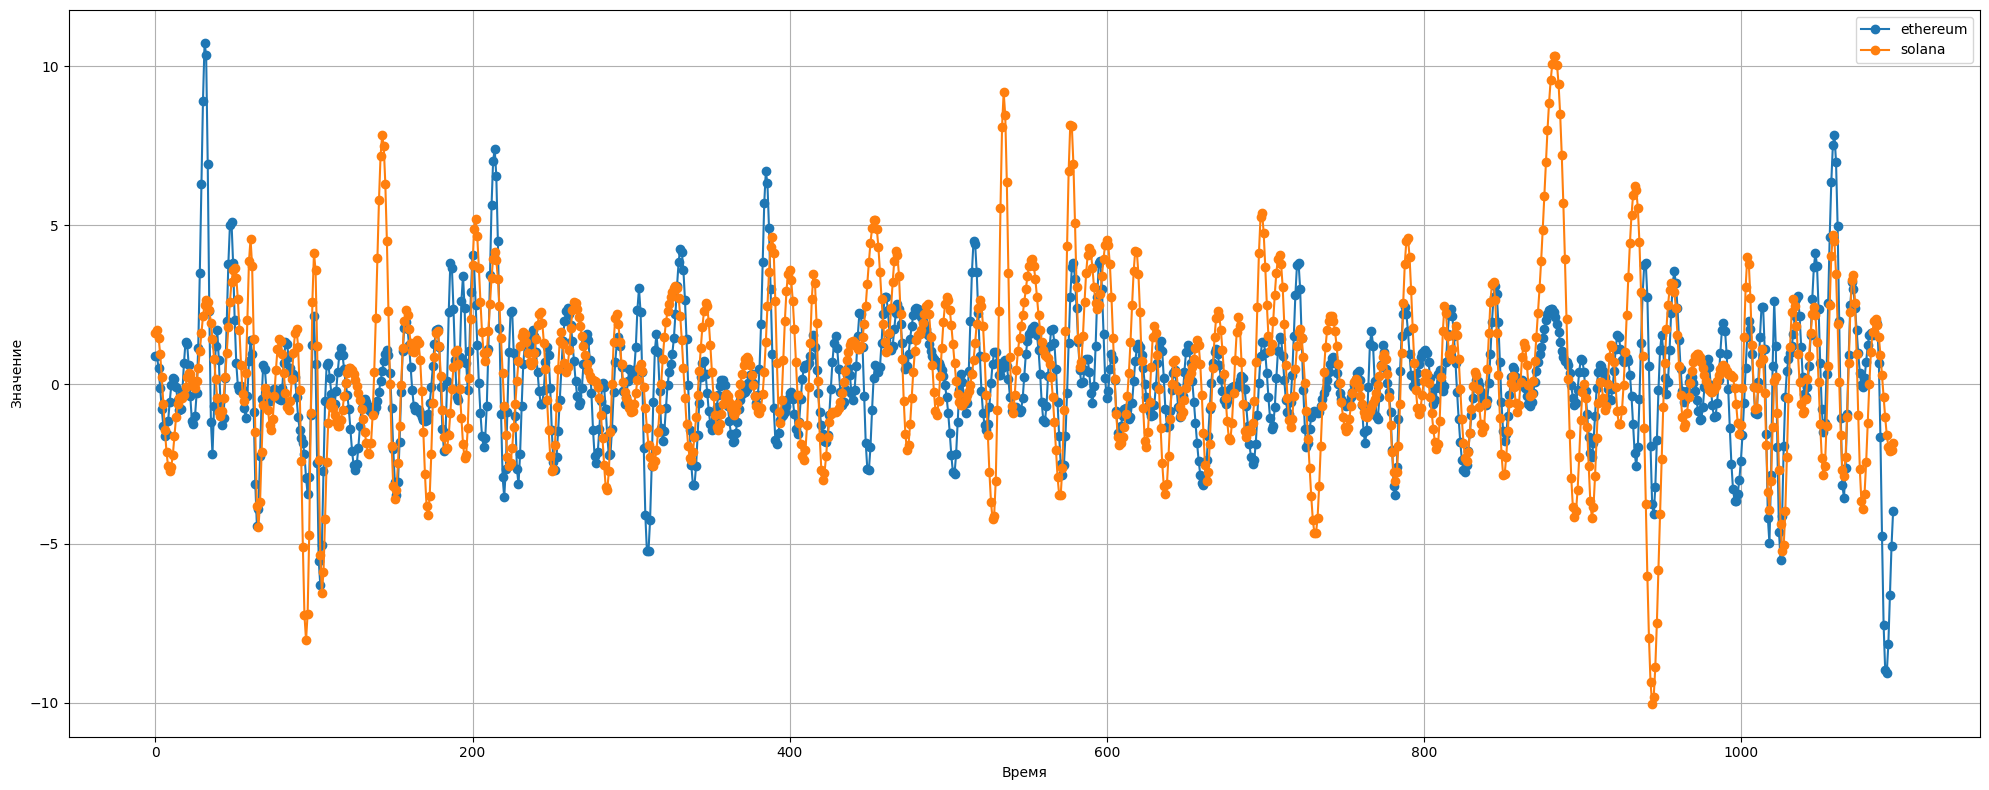

In [37]:
plt.figure(figsize=(20, 8))
plt.plot(ethereum_series_emd, marker='o', label="ethereum")
plt.plot(solana_series_emd, marker='o', label="solana")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
scaler_ethereum = MinMaxScaler()
ethereum_series_scaled = scaler_ethereum.fit_transform(ethereum_series_emd.to_numpy().reshape(-1, 1))


In [42]:
scaler_solana = MinMaxScaler()
solana_series_scaled = scaler_solana.fit_transform(solana_series_emd.to_numpy().reshape(-1, 1))


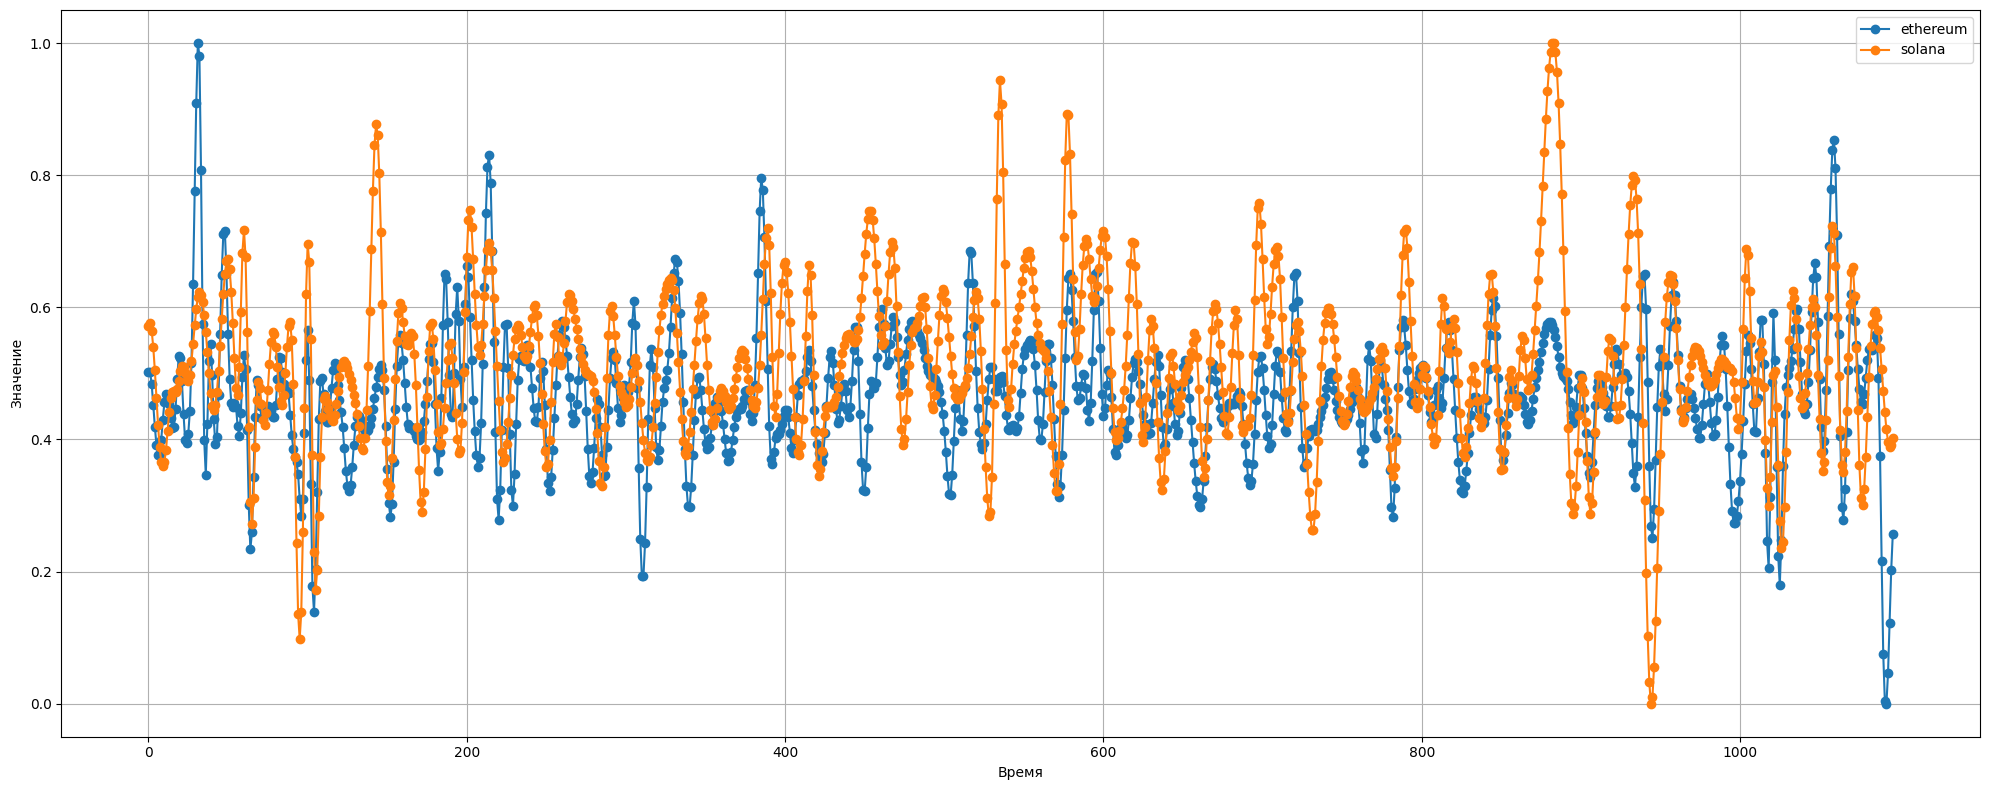

In [43]:
plt.figure(figsize=(20, 8))
plt.plot(ethereum_series_scaled, marker='o', label="ethereum")
plt.plot(solana_series_scaled, marker='o', label="solana")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
max_lag = 60
correlations = []

for lag in range(0, max_lag):
    shifted = ethereum_series_emd.shift(lag)
    corr = solana_series_emd.corr(shifted)
    correlations.append((lag, corr))

best_lag, best_corr = max(correlations, key=lambda x: abs(x[1]))
print(f"Лучшая корреляция: лаг = {best_lag} дней, корреляция = {best_corr:.3f}")

Лучшая корреляция: лаг = 0 дней, корреляция = 0.454


In [46]:
X = ethereum_series_scaled
y = solana_series_scaled

model = LinearRegression()
model.fit(X, y)

print(f"R²: {model.score(X, y):.3f}")

R²: 0.206


In [48]:
tether_series = tether['Изм. Капитализ.'].values

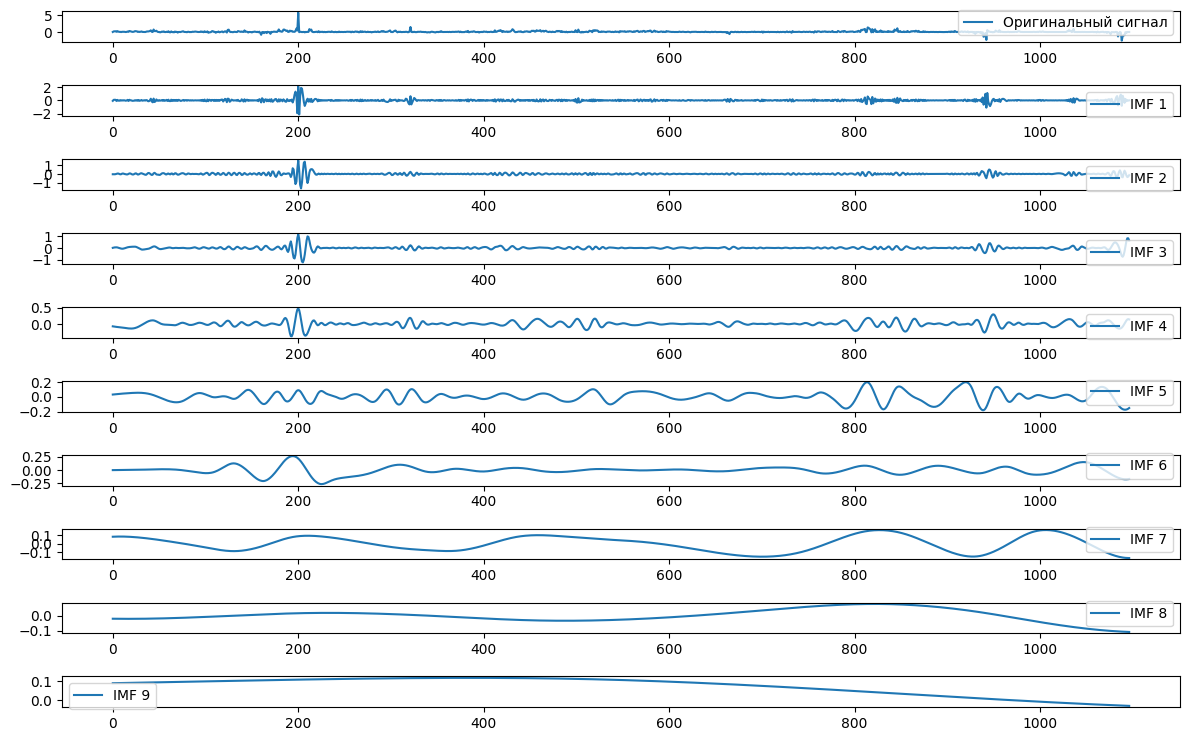

In [49]:
emd_tether = EMD()
imfs_tether = emd_tether(tether_series)

# Визуализация
plt.figure(figsize=(12, 8))
plt.subplot(len(imfs_tether)+2, 1, 1)
plt.plot(tether_series, label='Оригинальный сигнал')
plt.legend()

# Все IMFs
for i, imf in enumerate(imfs_tether):
    plt.subplot(len(imfs_tether)+2, 1, i+2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend()

plt.tight_layout()  # Чтобы графики не налезали друг на друга

# Показываем график
plt.show()

In [50]:
tether_series_emd = np.sum(imfs_tether[2:8], axis=0)
tether_series_emd = pd.Series(tether_series_emd)

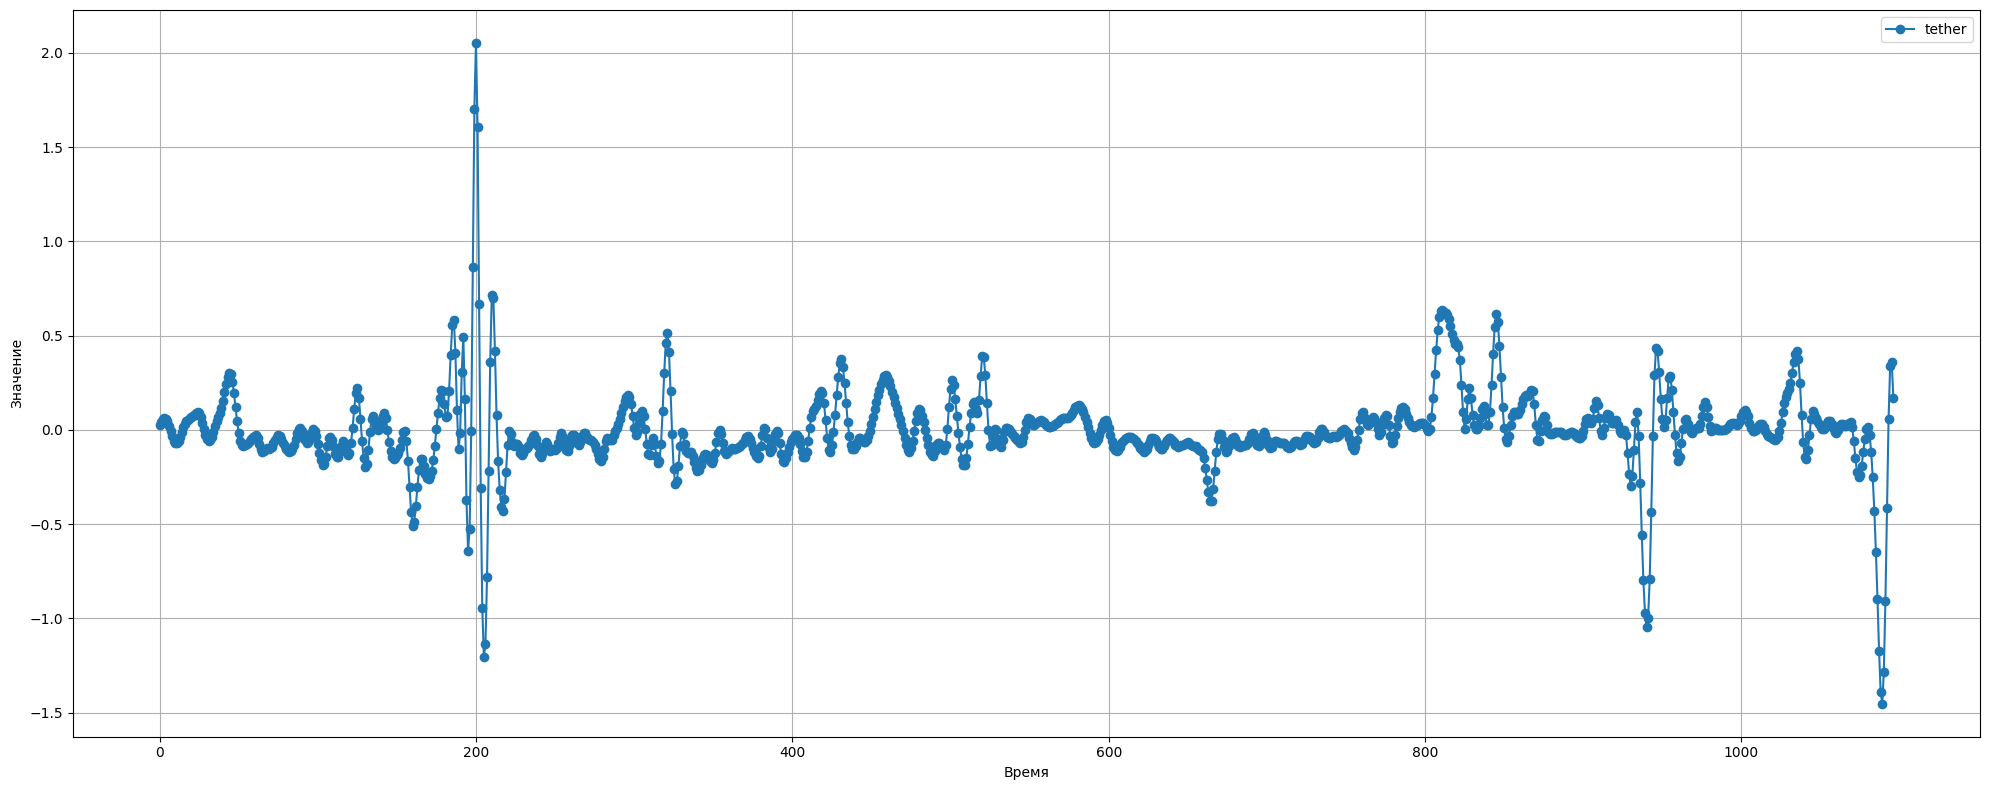

In [51]:
plt.figure(figsize=(20, 8))
plt.plot(tether_series_emd, marker='o', label="tether")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
tether_solana = MinMaxScaler()
tether_series_scaled = tether_solana.fit_transform(tether_series_emd.to_numpy().reshape(-1, 1))


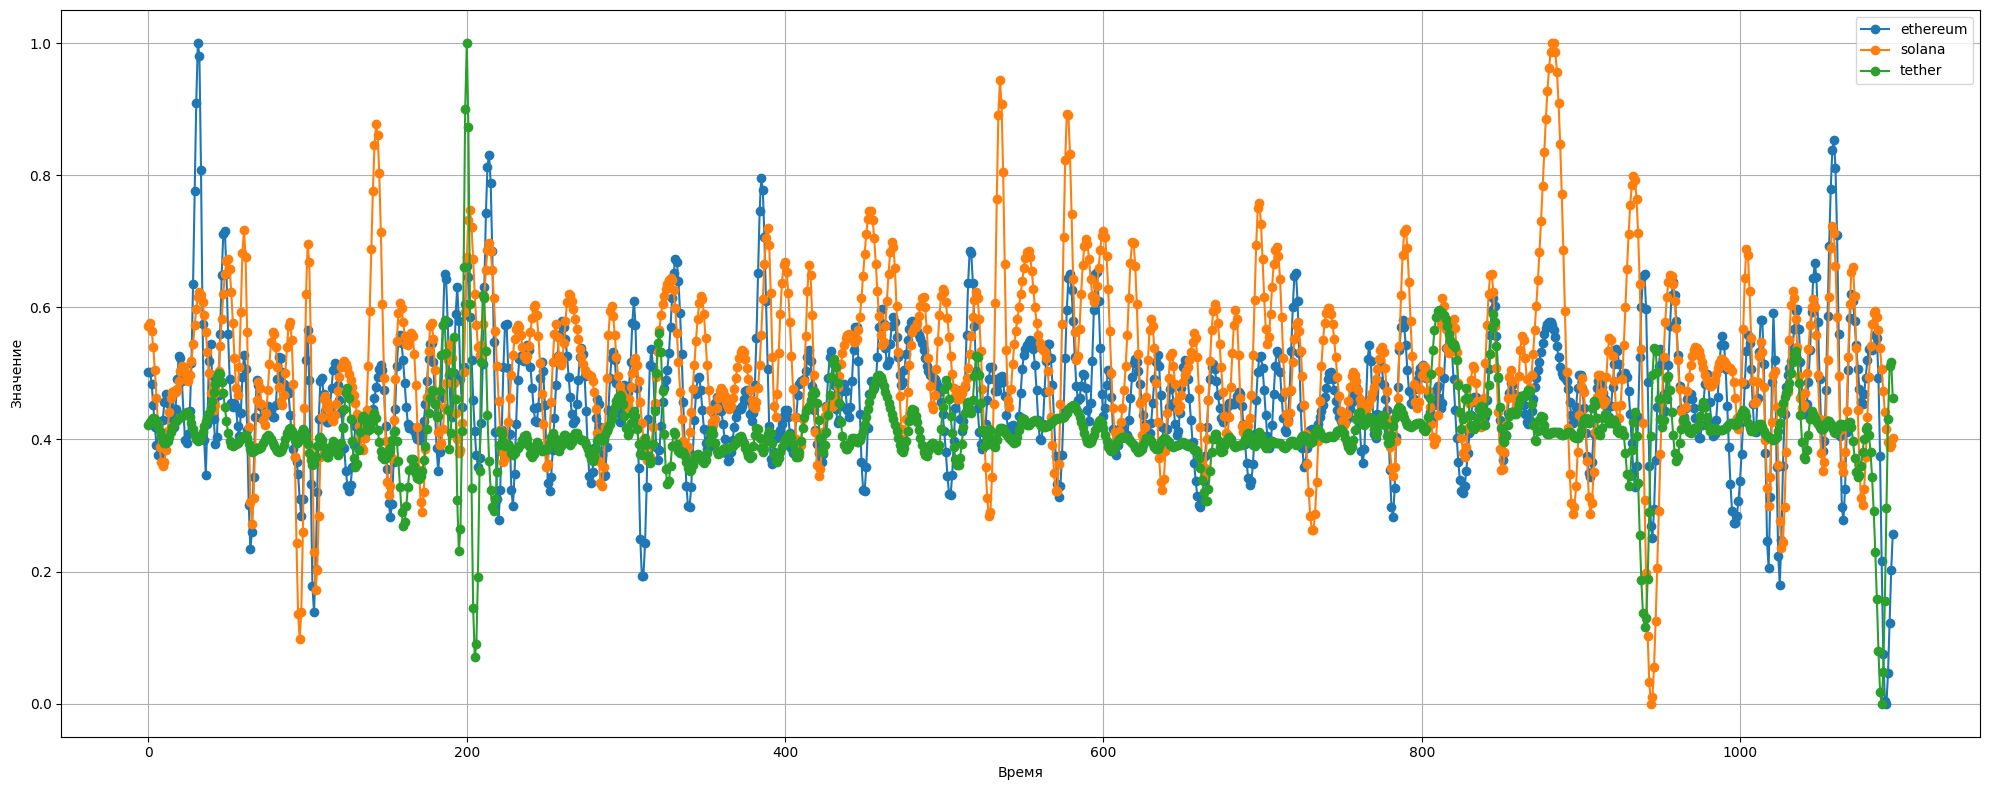

In [54]:
plt.figure(figsize=(20, 8))
plt.plot(ethereum_series_scaled, marker='o', label="ethereum")
plt.plot(solana_series_scaled, marker='o', label="solana")
plt.plot(tether_series_scaled, marker='o', label="tether")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
max_lag = 60
correlations = []

for lag in range(0, max_lag):
    shifted = tether_series_emd.shift(lag)
    corr = ethereum_series_emd.corr(shifted)
    correlations.append((lag, corr))

best_lag, best_corr = max(correlations, key=lambda x: abs(x[1]))
print(f"Лучшая корреляция: лаг = {best_lag} дней, корреляция = {best_corr:.3f}")  

Лучшая корреляция: лаг = 3 дней, корреляция = 0.289


In [57]:
max_lag = 60
correlations = []

for lag in range(0, max_lag):
    shifted = tether_series_emd.shift(lag)
    corr = solana_series_emd.corr(shifted)
    correlations.append((lag, corr))

best_lag, best_corr = max(correlations, key=lambda x: abs(x[1]))
print(f"Лучшая корреляция: лаг = {best_lag} дней, корреляция = {best_corr:.3f}")

Лучшая корреляция: лаг = 3 дней, корреляция = 0.206


In [59]:
freqs, power = periodogram(ethereum_series_emd)
dominant_freq_index = np.argmax(power[1:]) + 1  # пропускаем нулевую частоту
dominant_freq = freqs[dominant_freq_index]
seasonal_period = int(round(1 / dominant_freq))

seasonal_period

84

In [60]:
y = ethereum_series_emd
t = np.arange(1, len(y) + 1)  # т.к. индекс начинается с 1

min_freq = 1/100  # например, максимум период 100 шагов
max_freq = 1/2   # минимум период 2 шага (Nyquist)
frequency, power = LombScargle(t, y).autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
best_freq = frequency[np.argmax(power)]
best_period = 1 / best_freq
print(f"Best frequency: {best_freq:.4f}")
print(f"Best period: {best_period:.2f}")

Best frequency: 0.0416
Best period: 24.06


In [61]:
freqs, power = periodogram(solana_series_emd)
dominant_freq_index = np.argmax(power[1:]) + 1  # пропускаем нулевую частоту
dominant_freq = freqs[dominant_freq_index]
seasonal_period_solana = int(round(1 / dominant_freq))

seasonal_period_solana

42

In [65]:
y = solana_series_emd
t = np.arange(1, len(y) + 1)  # т.к. индекс начинается с 1

min_freq = 1/100  # например, максимум период 100 шагов
max_freq = 1/2   # минимум период 2 шага (Nyquist)
frequency, power = LombScargle(t, y).autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
best_freq_solana = frequency[np.argmax(power)]
best_period_solana = 1 / best_freq_solana
print(f"Best frequency: {best_freq_solana:.4f}")
print(f"Best period: {best_period_solana:.2f}")

Best frequency: 0.0742
Best period: 13.47


In [63]:
freqs, power = periodogram(tether_series_emd)
dominant_freq_index = np.argmax(power[1:]) + 1  # пропускаем нулевую частоту
dominant_freq = freqs[dominant_freq_index]
seasonal_period_tether = int(round(1 / dominant_freq))

seasonal_period_tether

366

In [66]:
y = tether_series_emd
t = np.arange(1, len(y) + 1)  # т.к. индекс начинается с 1

min_freq = 1/100  # например, максимум период 100 шагов
max_freq = 1/2   # минимум период 2 шага (Nyquist)
frequency, power = LombScargle(t, y).autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
best_freq_tether = frequency[np.argmax(power)]
best_period_tether = 1 / best_freq_tether
print(f"Best frequency: {best_freq_tether:.4f}")
print(f"Best period: {best_period_tether:.2f}")

Best frequency: 0.0129
Best period: 77.40


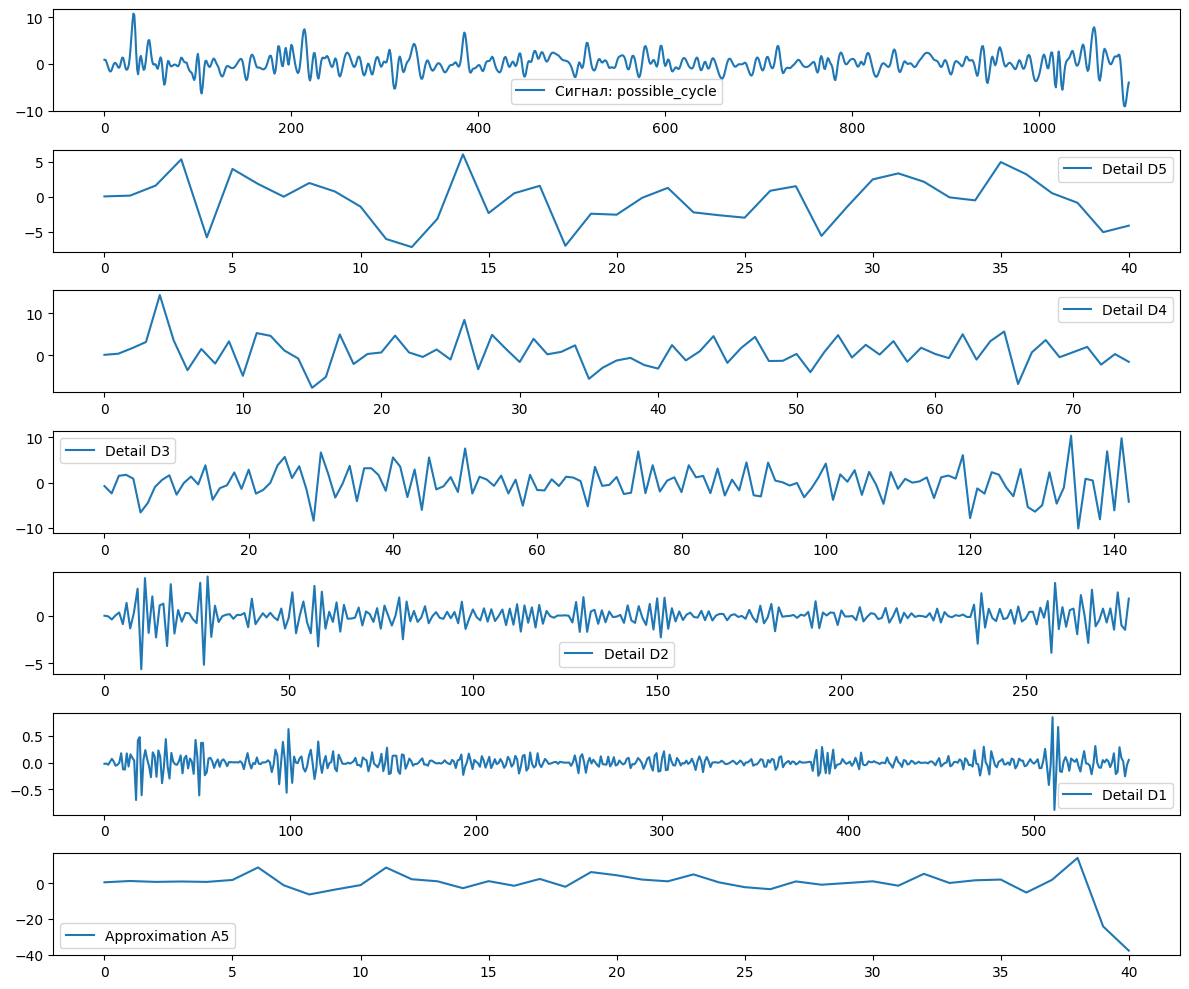

In [68]:
# Вейвлет-декомпозиция
wavelet = 'db4'
level = 5

coeffs = pywt.wavedec(ethereum_series_emd, wavelet=wavelet, level=level)

# Визуализация
plt.figure(figsize=(12, 10))
plt.subplot(level + 2, 1, 1)
plt.plot(ethereum_series_emd, label="Сигнал: possible_cycle")
plt.legend()

for i, coeff in enumerate(coeffs[1:], 1):  # Пропускаем аппроксимацию
    plt.subplot(level + 2, 1, i + 1)
    plt.plot(coeff, label=f'Detail D{level - i + 1}')
    plt.legend()

plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs[0], label=f'Approximation A{level}')
plt.legend()


plt.tight_layout()
plt.show()

In [70]:
# Обнуляем трендовую часть A5
ethereum_series_wev = coeffs.copy()
ethereum_series_wev[0] = np.zeros_like(coeffs[0])

# Восстанавливаем только на основе D1–D5
cycle_component = pywt.waverec(ethereum_series_wev, wavelet=wavelet)

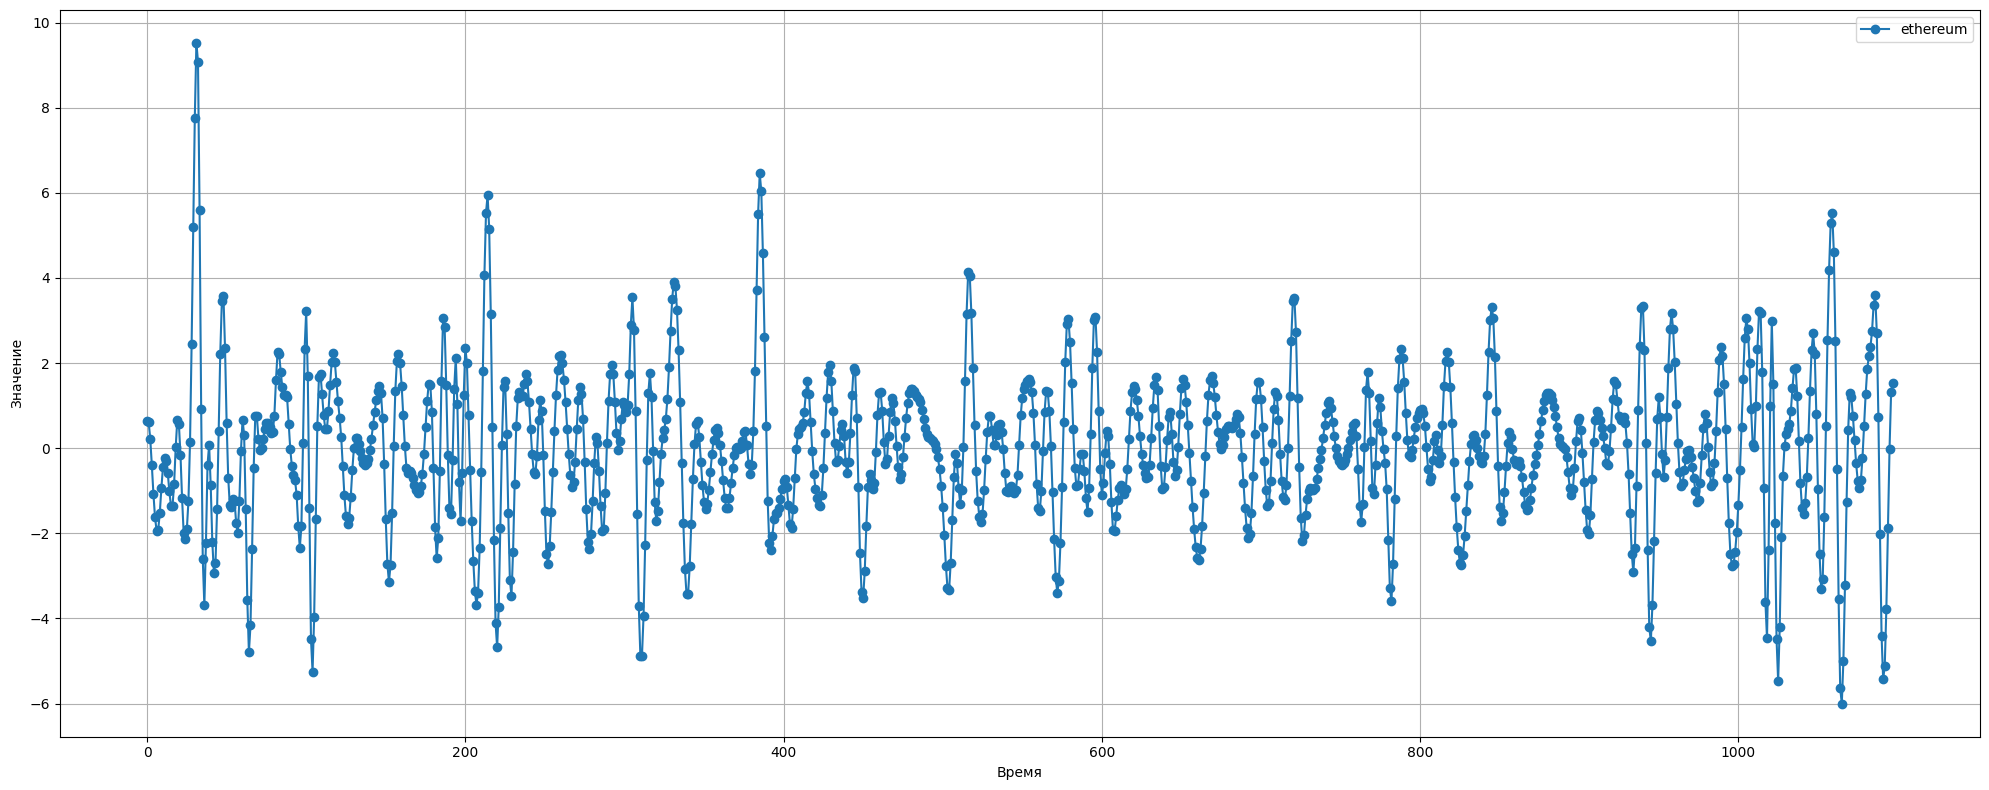

In [71]:
plt.figure(figsize=(20, 8))
plt.plot(cycle_component, marker='o', label="ethereum")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

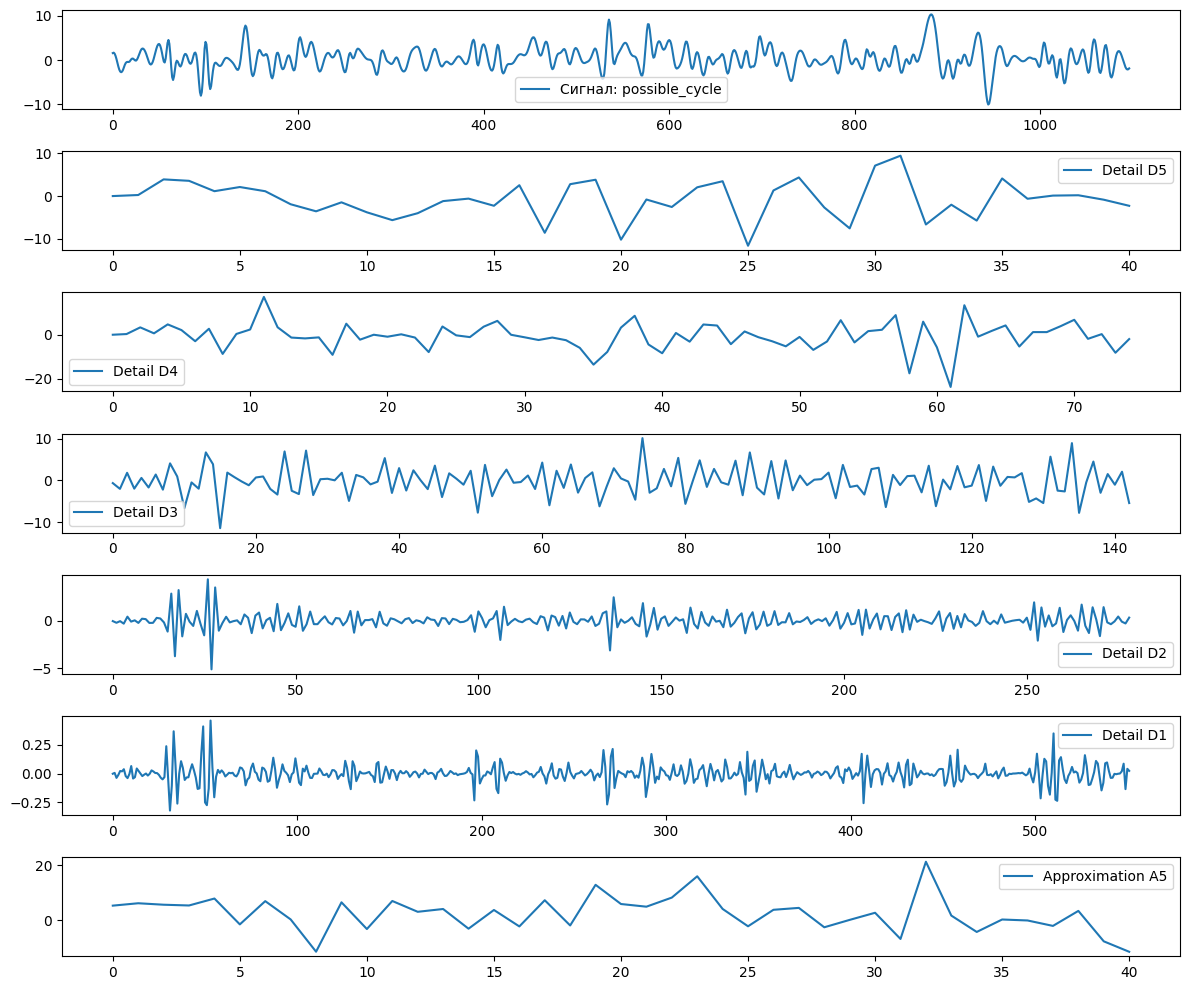

In [72]:
# Вейвлет-декомпозиция
wavelet = 'db4'
level = 5

coeffs_solana = pywt.wavedec(solana_series_emd, wavelet=wavelet, level=level)

# Визуализация
plt.figure(figsize=(12, 10))
plt.subplot(level + 2, 1, 1)
plt.plot(solana_series_emd, label="Сигнал: possible_cycle")
plt.legend()

for i, coeff in enumerate(coeffs_solana[1:], 1):  # Пропускаем аппроксимацию
    plt.subplot(level + 2, 1, i + 1)
    plt.plot(coeff, label=f'Detail D{level - i + 1}')
    plt.legend()

plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs_solana[0], label=f'Approximation A{level}')
plt.legend()


plt.tight_layout()
plt.show()